# Secom Dosyası Üzerinden İşlemler

**Data Manipulasyonu yapılacak**

_Let's Begin_


\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as p
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("/home/elci/predy/PredY/secom/data/Secom_csv.csv") 

/home/elci/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df.head(10)

Unnamed: 0  Fail                Tarih       X1       X2         X3  \
0           1     0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333   
1           2     0  2008-07-19 12:32:00  3095.78  2465.14  2230.4222   
2           3     1  2008-07-19 13:17:00  2932.61  2559.94  2186.4111   
3           4     0  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   
4           5     0  2008-07-19 15:22:00  3032.24  2502.87  2233.3667   
5           6     0  2008-07-19 17:53:00  2946.25  2432.84  2233.3667   
6           7     0  2008-07-19 19:44:00  3030.27  2430.12  2230.4222   
7           8     0  2008-07-19 19:45:00  3058.88  2690.15  2248.9000   
8           9     0  2008-07-19 20:24:00  2967.68  2600.47  2248.9000   
9          10     0  2008-07-19 21:35:00  3016.11  2428.37  2248.9000   

          X4      X5     X6        X7    ...       X581      X582    X583  \
0  1411.1265  1.3602  100.0   97.6133    ...        NaN       NaN  0.5005   
1  1463.6606  0.8294  100.0  102.3433    ...     0.0060  208.2045  0.5019   
2  1698.0172  1.5102  100.0   95.4878    ...     0.0148   82.8602  0.4958   
3   909.7926  1.3204  100.0  104.2367    ...     0.0044   73.8432  0.4990   
4  1326.5200  1.5334  100.0  100.3967    ...        NaN       NaN  0.4800   
5  1326.5200  1.5334  100.0  100.3967    ...     0.0052   44.0077  0.4949   
6  1463.6606  0.8294  100.0  102.3433    ...        NaN       NaN  0.5010   
7  1004.4692  0.7884  100.0  106.2400    ...     0.0063   95.0310  0.4984   
8  1004.4692  0.7884  100.0  106.2400    ...     0.0045  111.6525  0.4993   
9  1004.4692  0.7884  100.0  106.2400    ...     0.0073   90.2294  0.4967   

     X584    X585     X586    X587    X588    X589      X590  
0  0.0118  0.0035   2.3630     NaN     NaN     NaN       NaN  
1  0.0223  0.0055   4.4447  0.0096  0.0201  0.0060  208.2045  
2  0.0157  0.0039   3.1745  0.0584  0.0484  0.0148   82.8602  
3  0.0103  0.0025   2.0544  0.0202  0.0149  0.0044   73.8432  
4  0.4766  0.1045  99.3032  0.0202  0.0149  0.0044   73.8432  
5  0.0189  0.0044   3.8276  0.0342  0.0151  0.0052   44.0077  
6  0.0143  0.0042   2.8515  0.0342  0.0151  0.0052   44.0077  
7  0.0106  0.0034   2.1261  0.0204  0.0194  0.0063   95.0310  
8  0.0172  0.0046   3.4456  0.0111  0.0124  0.0045  111.6525  
9  0.0152  0.0038   3.0687  0.0212  0.0191  0.0073   90.2294  

[10 rows x 593 columns]

In [3]:
df.describe()

Unnamed: 0         Fail           X1           X2           X3  \
count  1567.00000  1567.000000  1561.000000  1560.000000  1553.000000   
mean    784.00000     0.066369  3014.452896  2495.850231  2200.547318   
std     452.49825     0.249005    73.621787    80.407705    29.513152   
min       1.00000     0.000000  2743.240000  2158.750000  2060.660000   
25%     392.50000     0.000000  2966.260000  2452.247500  2181.044400   
50%     784.00000     0.000000  3011.490000  2499.405000  2201.066700   
75%    1175.50000     0.000000  3056.650000  2538.822500  2218.055500   
max    1567.00000     1.000000  3356.350000  2846.440000  2315.266700   

                X4           X5      X6           X7           X8  \
count  1553.000000  1553.000000  1553.0  1553.000000  1558.000000   
mean   1396.376627     4.197013   100.0   101.112908     0.121822   
std     441.691640    56.355540     0.0     6.237214     0.008961   
min       0.000000     0.681500   100.0    82.131100     0.000000   
25%    1081.875800     1.017700   100.0    97.920000     0.121100   
50%    1285.214400     1.316800   100.0   101.512200     0.122400   
75%    1591.223500     1.525700   100.0   104.586700     0.123800   
max    3715.041700  1114.536600   100.0   129.252200     0.128600   

          ...             X581        X582         X583         X584  \
count     ...       618.000000  618.000000  1566.000000  1566.000000   
mean      ...         0.005396   97.934373     0.500096     0.015318   
std       ...         0.003116   87.520966     0.003404     0.017180   
min       ...         0.001000    0.000000     0.477800     0.006000   
25%       ...         0.003400   46.184900     0.497900     0.011600   
50%       ...         0.004700   72.288900     0.500200     0.013800   
75%       ...         0.006475  116.539150     0.502375     0.016500   
max       ...         0.028600  737.304800     0.509800     0.476600   

              X585         X586         X587         X588         X589  \
count  1566.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean      0.003847     3.067826     0.021458     0.016475     0.005283   
std       0.003720     3.578033     0.012358     0.008808     0.002867   
min       0.001700     1.197500    -0.016900     0.003200     0.001000   
25%       0.003100     2.306500     0.013425     0.010600     0.003300   
50%       0.003600     2.757650     0.020500     0.014800     0.004600   
75%       0.004100     3.295175     0.027600     0.020300     0.006400   
max       0.104500    99.303200     0.102800     0.079900     0.028600   

              X590  
count  1566.000000  
mean     99.670066  
std      93.891919  
min       0.000000  
25%      44.368600  
50%      71.900500  
75%     114.749700  
max     737.304800  

[8 rows x 592 columns]

In [4]:
df['Fail'].value_counts()

0    1463
1     104
Name: Fail, dtype: int64

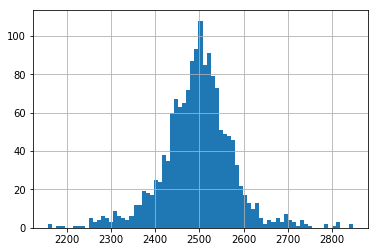

In [5]:
df['X2'].hist(bins=75)

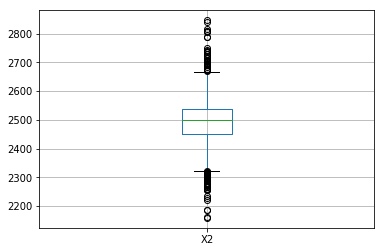

In [6]:
df.boxplot(column='X2')

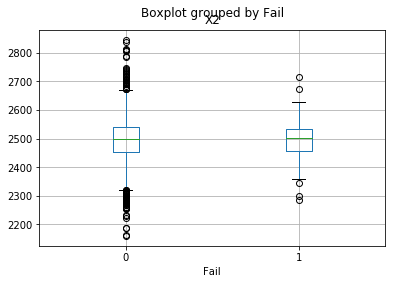

In [7]:
df.boxplot(column='X2', by = 'Fail')

In [8]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0      0
Fail            0
Tarih           0
X1              6
X2              7
X3             14
X4             14
X5             14
X6             14
X7             14
X8              9
X9              2
X10             2
X11             2
X12             2
X13             2
X14             3
X15             3
X16             3
X17             3
X18             3
X19             3
X20            10
X21             0
X22             2
X23             2
X24             2
X25             2
X26             2
X27             2
             ... 
X561            1
X562            1
X563          273
X564          273
X565          273
X566          273
X567          273
X568          273
X569          273
X570          273
X571            0
X572            0
X573            0
X574            0
X575            0
X576            0
X577            0
X578            0
X579          949
X580          949
X581          949
X582          949
X583            1
X584            1
X585      

In [9]:
len(df.columns)

593

In [10]:
count = 0
n=1
threshold_value=250

In [11]:
dff=df

**Threshold sayısından daha az NA içeren parametreler tutulduğu fonksiyon**

In [12]:
try:

    while (count < len(df.columns)-n-1):
        sys.stdout.write("-")
        if (dff.apply(lambda x: sum(x.isnull()),axis=0)[count] > threshold_value):
            print ("\n",count+n-1,'.değişken atıldı  ',"içerdiği na sayısı=",dff.apply(lambda x: sum(x.isnull()),axis=0)[count],"    toplamda atılan değişken sayısı=",n)
            dff=dff.drop(dff.columns[count],axis=1)
            n=n+1           
            count-= 1
        count= count + 1
except:
    print("out of bound ")    


----------------------------------------------------------------------------
 75 .değişken atıldı   içerdiği na sayısı= 794     toplamda atılan değişken sayısı= 1
-
 76 .değişken atıldı   içerdiği na sayısı= 794     toplamda atılan değişken sayısı= 2
------------
 88 .değişken atıldı   içerdiği na sayısı= 1341     toplamda atılan değişken sayısı= 3
------------------------
 112 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 4
-
 113 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 5
-
 114 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 6
-
 115 .değişken atıldı   içerdiği na sayısı= 715     toplamda atılan değişken sayısı= 7
---------------------------------------------
 160 .değişken atıldı   içerdiği na sayısı= 1429     toplamda atılan değişken sayısı= 8
-
 161 .değişken atıldı   içerdiği na sayısı= 1429     toplamda atılan değişken sayısı= 9
-------------------------------------------

In [13]:
count

539

In [14]:
dff.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0     0
Fail           0
Tarih          0
X1             6
X2             7
X3            14
X4            14
X5            14
X6            14
X7            14
X8             9
X9             2
X10            2
X11            2
X12            2
X13            2
X14            3
X15            3
X16            3
X17            3
X18            3
X19            3
X20           10
X21            0
X22            2
X23            2
X24            2
X25            2
X26            2
X27            2
              ..
X537           9
X538           9
X539           9
X540           8
X541           8
X542           8
X543           2
X544           2
X545           2
X546           2
X559           1
X560           1
X561           1
X562           1
X571           0
X572           0
X573           0
X574           0
X575           0
X576           0
X577           0
X578           0
X583           1
X584           1
X585           1
X586           1
X587           1
X588          

In [15]:
dff

Unnamed: 0  Fail                Tarih       X1       X2         X3  \
0              1     0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333   
1              2     0  2008-07-19 12:32:00  3095.78  2465.14  2230.4222   
2              3     1  2008-07-19 13:17:00  2932.61  2559.94  2186.4111   
3              4     0  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   
4              5     0  2008-07-19 15:22:00  3032.24  2502.87  2233.3667   
5              6     0  2008-07-19 17:53:00  2946.25  2432.84  2233.3667   
6              7     0  2008-07-19 19:44:00  3030.27  2430.12  2230.4222   
7              8     0  2008-07-19 19:45:00  3058.88  2690.15  2248.9000   
8              9     0  2008-07-19 20:24:00  2967.68  2600.47  2248.9000   
9             10     0  2008-07-19 21:35:00  3016.11  2428.37  2248.9000   
10            11     1  2008-07-19 21:57:00  2994.05  2548.21  2195.1222   
11            12     1  2008-07-19 22:52:00  2928.84  2479.40  2196.2111   
12            13     0  2008-07-20 03:35:00  2920.07  2507.40  2195.1222   
13            14     0  2008-07-21 08:21:00  3051.44  2529.27  2184.4333   
14            15     1  2008-07-21 11:53:00  2963.97  2629.48  2224.6222   
15            16     0  2008-07-22 00:03:00  2988.31  2546.26  2224.6222   
16            17     0  2008-07-22 02:59:00  3028.02  2560.87  2270.2556   
17            18     0  2008-07-22 08:41:00  3032.73  2517.79  2270.2556   
18            19     0  2008-07-22 11:47:00  3040.34  2501.16  2207.3889   
19            20     0  2008-07-22 14:00:00  2988.30  2519.05  2208.8556   
20            21     0  2008-07-22 15:30:00  2987.32  2528.81        NaN   
21            22     0  2008-07-23 05:15:00      NaN  2481.85  2207.3889   
22            23     0  2008-07-23 19:22:00  3002.27  2497.45  2207.3889   
23            24     1  2008-07-25 15:23:00  2884.74  2514.54  2160.3667   
24            25     0  2008-07-27 04:18:00  3010.41  2632.80  2203.9000   
25            26     0  2008-07-27 09:37:00  2979.74  2446.56  2257.1667   
26            27     0  2008-07-27 11:10:00  3067.35  2456.33  2257.1667   
27            28     0  2008-07-27 15:46:00  2988.99  2607.63  2223.0333   
28            29     0  2008-07-27 16:06:00  2972.78  2431.57  2190.4889   
29            30     0  2008-07-27 16:49:00  2981.85  2529.11  2180.3778   
...          ...   ...                  ...      ...      ...        ...   
1537        1538     0  2008-10-15 18:16:00  3006.22  2525.20  2192.7889   
1538        1539     0  2008-10-15 19:15:00  3128.11  2367.16  2223.5333   
1539        1540     0  2008-10-15 19:24:00  2908.94  2560.99  2187.3444   
1540        1541     0  2008-10-15 21:44:00  2996.04  2555.92  2190.7666   
1541        1542     0  2008-10-15 22:45:00  3246.31  2499.79  2216.8111   
1542        1543     0  2008-10-15 22:54:00  2965.57  2487.91  2210.3556   
1543        1544     0  2008-10-15 23:00:00  3109.18  2447.97  2210.3556   
1544        1545     0  2008-10-15 23:45:00  3108.98  2537.73  2210.3556   
1545        1546     0  2008-10-16 02:16:00  3100.19  2490.60  2212.8445   
1546        1547     0  2008-10-16 02:16:00  3093.24  2488.18  2212.8445   
1547        1548     0  2008-10-16 02:17:00  3008.77  2542.36  2167.4222   
1548        1549     0  2008-10-16 02:22:00  3027.01  2464.98  2212.6334   
1549        1550     0  2008-10-16 02:55:00  3183.63  2498.00  2195.4444   
1550        1551     0  2008-10-16 03:56:00  3072.20  2406.47  2195.4444   
1551        1552     0  2008-10-16 04:02:00  2958.43  2489.06  2192.7556   
1552        1553     0  2008-10-16 04:02:00  2939.35  2521.98  2195.1000   
1553        1554     0  2008-10-16 04:04:00  3020.79  2500.19  2210.3556   
1554        1555     0  2008-10-16 04:47:00  3031.78  2528.55  2182.5555   
1555        1556     0  2008-10-16 04:50:00  2902.96  2515.03  2181.1889   
1556        1557     0  2008-10-16 04:54:00  3025.21  2503.30  2179.7333   
1557        1558     0  2008-10-16 05:08:00  3072.10  

**Değişken tipi için**
**Parametrelerin rölatif unique değerleri hesaplanıyor**

**THRESHOLD Gerekli**

In [16]:
i=2
Threshold=0

In [17]:
dropped=dff.dropna()
dropped

Unnamed: 0  Fail                Tarih       X1       X2         X3  \
1              2     0  2008-07-19 12:32:00  3095.78  2465.14  2230.4222   
2              3     1  2008-07-19 13:17:00  2932.61  2559.94  2186.4111   
3              4     0  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   
4              5     0  2008-07-19 15:22:00  3032.24  2502.87  2233.3667   
5              6     0  2008-07-19 17:53:00  2946.25  2432.84  2233.3667   
6              7     0  2008-07-19 19:44:00  3030.27  2430.12  2230.4222   
7              8     0  2008-07-19 19:45:00  3058.88  2690.15  2248.9000   
8              9     0  2008-07-19 20:24:00  2967.68  2600.47  2248.9000   
9             10     0  2008-07-19 21:35:00  3016.11  2428.37  2248.9000   
10            11     1  2008-07-19 21:57:00  2994.05  2548.21  2195.1222   
11            12     1  2008-07-19 22:52:00  2928.84  2479.40  2196.2111   
12            13     0  2008-07-20 03:35:00  2920.07  2507.40  2195.1222   
13            14     0  2008-07-21 08:21:00  3051.44  2529.27  2184.4333   
14            15     1  2008-07-21 11:53:00  2963.97  2629.48  2224.6222   
15            16     0  2008-07-22 00:03:00  2988.31  2546.26  2224.6222   
16            17     0  2008-07-22 02:59:00  3028.02  2560.87  2270.2556   
17            18     0  2008-07-22 08:41:00  3032.73  2517.79  2270.2556   
18            19     0  2008-07-22 11:47:00  3040.34  2501.16  2207.3889   
19            20     0  2008-07-22 14:00:00  2988.30  2519.05  2208.8556   
22            23     0  2008-07-23 19:22:00  3002.27  2497.45  2207.3889   
23            24     1  2008-07-25 15:23:00  2884.74  2514.54  2160.3667   
24            25     0  2008-07-27 04:18:00  3010.41  2632.80  2203.9000   
25            26     0  2008-07-27 09:37:00  2979.74  2446.56  2257.1667   
27            28     0  2008-07-27 15:46:00  2988.99  2607.63  2223.0333   
28            29     0  2008-07-27 16:06:00  2972.78  2431.57  2190.4889   
29            30     0  2008-07-27 16:49:00  2981.85  2529.11  2180.3778   
30            31     0  2008-07-27 20:24:00  2975.88  2489.70  2191.6667   
31            32     0  2008-07-27 22:28:00  3058.61  2492.36  2180.3778   
32            33     0  2008-07-27 22:28:00  3047.19  2524.18  2197.3111   
34            35     0  2008-07-28 03:31:00  2963.83  2457.64  2225.1777   
...          ...   ...                  ...      ...      ...        ...   
1491        1492     0  2008-10-13 21:47:00  3042.12  2444.67  2195.4444   
1493        1494     0  2008-10-13 22:48:00  3002.54  2549.85  2182.5555   
1494        1495     0  2008-10-13 22:54:00  3068.64  2498.02  2192.7556   
1496        1497     0  2008-10-14 03:21:00  3073.57  2528.59  2217.4111   
1497        1498     0  2008-10-14 03:28:00  2962.43  2543.10  2201.2889   
1503        1504     0  2008-10-14 14:43:00  2921.78  2483.77  2177.4333   
1506        1507     0  2008-10-14 20:01:00  2883.88  2515.46  2177.4333   
1509        1510     0  2008-10-14 21:36:00  2931.11  2485.99  2208.5889   
1511        1512     0  2008-10-15 00:03:00  2984.99  2501.05  2190.7666   
1514        1515     0  2008-10-15 01:52:00  2949.90  2447.26  2264.7000   
1517        1518     0  2008-10-15 02:40:00  2935.39  2575.41  2179.7333   
1518        1519     0  2008-10-15 02:40:00  3273.46  2276.93  2223.5333   
1519        1520     1  2008-10-15 02:42:00  2903.34  2585.48  2196.1111   
1520        1521     0  2008-10-15 03:24:00  2998.06  2465.43  2223.5333   
1521        1522     0  2008-10-15 04:08:00  2943.76  2481.99  2190.7666   
1523        1524     0  2008-10-15 05:16:00  2930.66  2538.33  2187.3444   
1524        1525     0  2008-10-15 06:49:00  3142.21  2389.91  2223.5333   
1525        1526     0  2008-10-15 07:36:00  2977.74  2611.50  2192.7889   
1526        1527     0  2008-10-15 07:55:00  3042.45  2530.96  2191.3556   
1529        1530     0  2008-10-15 10:00:00  3068.78  2452.52  2217.4111   
1531        1532     0  2008-10-15 13:14:00  2959.86  

In [18]:
a=[dropped.columns]
a[0]

Index(['Unnamed: 0', 'Fail', 'Tarih', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       ...
       'X577', 'X578', 'X583', 'X584', 'X585', 'X586', 'X587', 'X588', 'X589',
       'X590'],
      dtype='object', length=541)

In [19]:
dictionary={}
dictionary

{}

In [20]:
for i in range(0,len(dropped.columns)):
    dictionary[a[0][i]]=len(set(dropped.iloc[:,i]))/len(dropped.iloc[:,i])


In [21]:
for k, v in dictionary.items():
    print (k + ' rölatif frekansı= ' + str(v))

Unnamed: 0 rölatif frekansı= 1.0
Fail rölatif frekansı= 0.0014357501794687725
Tarih rölatif frekansı= 0.9827709978463748
X1 rölatif frekansı= 0.9763101220387652
X2 rölatif frekansı= 0.9698492462311558
X3 rölatif frekansı= 0.34673366834170855
X4 rölatif frekansı= 0.3539124192390524
X5 rölatif frekansı= 0.3431442928930366
X6 rölatif frekansı= 0.0007178750897343862
X7 rölatif frekansı= 0.34816941852117733
X8 rölatif frekansı= 0.06317300789662599
X9 rölatif frekansı= 0.791816223977028
X10 rölatif frekansı= 0.3912419239052405
X11 rölatif frekansı= 0.2742282842785355
X12 rölatif frekansı= 0.26776740847092606
X13 rölatif frekansı= 0.9913854989231874
X14 rölatif frekansı= 0.0007178750897343862
X15 rölatif frekansı= 0.9956927494615937
X16 rölatif frekansı= 0.9985642498205313
X17 rölatif frekansı= 0.9526202440775305
X18 rölatif frekansı= 0.19885139985642497
X19 rölatif frekansı= 0.9921033740129217
X20 rölatif frekansı= 0.24192390524048815
X21 rölatif frekansı= 0.3840631730078966
X22 rölatif frek

In [22]:
threshold_rolative=0.20

**Rölatif Frekansı Threshold Değerinden Küçük Olan Her Sütunu Bastır.**

for k, v in dictionary.items():
    if v<threshold_rolative:
        print(dropped[k])

In [23]:
for k, v in dictionary.items():
    if v<threshold_rolative:
        dropped[k]=dropped[k].astype('category')

/home/elci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
kategorik_değişkenli_data=dropped.select_dtypes(include=['category'])

In [25]:
float_degiskenli_data=dropped.select_dtypes(include=['float'])
float_degiskenli_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 1 to 1550
Columns: 331 entries, X1 to X590
dtypes: float64(331)
memory usage: 3.5 MB


In [26]:
print("kategorik degisken sayısı=",len(kategorik_değişkenli_data.columns),"\nfloat degisken sayısı=",len(float_degiskenli_data.columns),"\nToplam eğişken sayısı=",len(dropped.columns))

kategorik degisken sayısı= 208 
float degisken sayısı= 331 
Toplam eğişken sayısı= 541


In [27]:
hedef_fail=kategorik_değişkenli_data.iloc[:,0]

In [28]:
kategorik_değişkenli_data.drop(["Fail"],axis=1)

X6      X8  X14     X18     X30     X41   X43  X50  X53    X54  \
1     100.0  0.1247  0.0  0.9701  2.2667  78.250  70.0  1.0  0.0  4.590   
2     100.0  0.1241  0.0  0.9674  2.3333  14.370  70.0  1.0  0.0  4.486   
3     100.0  0.1217  0.0  0.9687  2.6444  76.900  70.0  1.0  0.0  4.486   
4     100.0  0.1235  0.0  0.9735  3.1556  76.390  70.0  1.0  0.0  4.624   
5     100.0  0.1235  0.0  0.9747  1.6333  59.940  70.0  1.0  0.0  4.636   
6     100.0  0.1247  0.0  0.9667  2.4889  74.460  70.0  1.0  0.0  4.590   
7     100.0  0.1185  0.0  0.9687  2.7889  78.090  70.0  1.0  0.0  4.636   
8     100.0  0.1185  0.0  0.9693  2.1444  61.100  70.0  1.0  0.0  4.636   
9     100.0  0.1185  0.0  0.9667  2.3778  78.090  70.0  1.0  0.0  4.636   
10    100.0  0.1223  0.0  0.9664  1.9444  14.370  70.0  1.0  0.0  4.647   
11    100.0  0.1257  0.0  0.9673  2.0667  61.100  70.0  1.0  0.0  4.636   
12    100.0  0.1223  0.0  0.9666  2.8222  76.900  70.0  1.0  0.0  4.486   
13    100.0  0.1240  0.0  0.9516  2.3000  78.110  70.0  1.0  0.0  4.553   
14    100.0  0.1197  0.0  0.9692  2.4222  74.570  70.0  1.0  0.0  4.558   
15    100.0  0.1197  0.0  0.9706  2.2444  74.570  70.0  1.0  0.0  4.581   
16    100.0  0.1207  0.0  0.9673  2.9667  73.950  70.0  1.0  0.0  4.632   
17    100.0  0.1207  0.0  0.9692  2.2667  74.040  70.0  1.0  0.0  4.632   
18    100.0  0.1210  0.0  0.9701  2.9556   4.138  70.0  1.0  0.0  4.632   
19    100.0  0.1233  0.0  0.9697  2.4556  76.900  70.0  1.0  0.0  4.486   
22    100.0  0.1210  0.0  0.9706  2.9222   5.988  70.0  1.0  0.0  4.632   
23    100.0  0.1240  0.0  0.9696  2.0667  74.570  70.0  1.0  0.0  4.558   
24    100.0  0.1199  0.0  0.9802  2.4889  14.410  70.0  1.0  0.0  4.559   
25    100.0  0.1203  0.0  0.9559  2.4333  76.330  70.0  1.0  0.0  4.641   
27    100.0  0.1211  0.0  0.9715  2.8778  76.690  70.0  1.0  0.0  4.585   
28    100.0  0.1216  0.0  0.9574  2.2000  76.670  70.0  1.0  0.0  4.585   
29    100.0  0.1209  0.0  0.9629  2.6444  14.140  70.0  1.0  0.0  4.566   
30    100.0  0.1210  0.0  0.9596  2.1667  65.830  70.0  1.0  0.0  4.641   
31    100.0  0.1209  0.0  0.9582  2.9000  14.260  70.0  1.0  0.0  4.566   
32    100.0  0.1201  0.0  0.9720  3.0889  73.950  70.0  1.0  0.0  4.537   
34    100.0  0.1211  0.0  0.9651  2.2667  76.690  70.0  1.0  0.0  4.665   
...     ...     ...  ...     ...     ...     ...   ...  ...  ...    ...   
1491  100.0  0.1235  0.0  0.9717  1.4778  79.090  70.0  1.0  0.0  4.658   
1493  100.0  0.1252  0.0  0.9766  1.9000  78.980  70.0  1.0  0.0  4.043   
1494  100.0  0.1251  0.0  0.9716  2.4000  86.120  70.0  1.0  0.0  4.562   
1496  100.0  0.1195  0.0  0.9792  2.4222  81.130  70.0  1.0  0.0  4.646   
1497  100.0  0.1251  0.0  0.9720  2.2111  81.210  70.0  1.0  0.0  4.479   
1503  100.0  0.1253  0.0  0.9735  1.7222  78.210  70.0  1.0  0.0  4.463   
1506  100.0  0.1253  0.0  0.9801  2.1111  78.720  70.0  1.0  0.0  4.602   
1509  100.0  0.1207  0.0  0.9753  2.3111  77.370  70.0  1.0  0.0  4.591   
1511  100.0  0.1249  0.0  0.9806  1.8111  79.090  70.0  1.0  0.0  4.574   
1514  100.0  0.1173  0.0  0.9805  2.6222  75.340  70.0  1.0  0.0  4.594   
1517  100.0  0.1248  0.0  0.9796  2.4000  79.790  70.0  1.0  0.0  4.574   
1518  100.0  0.1196  0.0  0.9783  1.9222  78.980  70.0  1.0  0.0  4.592   
1519  100.0  0.1212  0.0  0.9736  2.2444  79.210  70.0  1.0  0.0  4.612   
1520  100.0  0.1196  0.0  0.9758  1.8778  78.210  70.0  1.0  0.0  4.538   
1521  100.0  0.1249  0.0  0.9736  2.5333  79.580  70.0  1.0  0.0  4.592   
1523  100.0  0.1235  0.0  0.9660  1.8000  79.800  70.0  1.0  0.0  4.479   
1524  100.0  0.1196  0.0  0.9691  1.7889   8.828  70.0  1.0  0.0  4.479   
1525  100.0  0.1268  0.0  0.9747  2.3444  80.850  70.0  1.0  0.0  4.564   
1526  100.0  0.1210  0.0  0.9755  1.7556   8.828  70.0  1.0  0.0  4.605   
1529  100.0  0.1195  0.0  0.9685  1.6000  81.630  70.0  1.0  0.0  4.653   
1531  100.0  0.1268  0.0  0.9712  2.4222  79.550  70.0  1.0  0.0  4.605   
1532  100.0  0.1255  0.0  0.9672  

In [29]:
float_degiskenli_data

X1       X2         X3         X4      X5        X7      X9  \
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  1.4966   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  1.4436   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  1.4882   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  1.5031   
5     2946.25  2432.84  2233.3667  1326.5200  1.5334  100.3967  1.5287   
6     3030.27  2430.12  2230.4222  1463.6606  0.8294  102.3433  1.5816   
7     3058.88  2690.15  2248.9000  1004.4692  0.7884  106.2400  1.5153   
8     2967.68  2600.47  2248.9000  1004.4692  0.7884  106.2400  1.5358   
9     3016.11  2428.37  2248.9000  1004.4692  0.7884  106.2400  1.5381   
10    2994.05  2548.21  2195.1222  1046.1468  1.3204  103.3400  1.5144   
11    2928.84  2479.40  2196.2111  1605.7578  0.9959   97.9156  1.4690   
12    2920.07  2507.40  2195.1222  1046.1468  1.3204  103.3400  1.5310   
13    3051.44  2529.27  2184.4333   877.6266  1.4668  107.8711  1.5236   
14    2963.97  2629.48  2224.6222   947.7739  1.2924  104.8489  1.4474   
15    2988.31  2546.26  2224.6222   947.7739  1.2924  104.8489  1.5465   
16    3028.02  2560.87  2270.2556  1258.4558  1.3950  104.8078  1.4368   
17    3032.73  2517.79  2270.2556  1258.4558  1.3950  104.8078  1.5537   
18    3040.34  2501.16  2207.3889   962.5317  1.2043  104.0311  1.5481   
19    2988.30  2519.05  2208.8556  1157.7224  1.5509  107.8022  1.5362   
22    3002.27  2497.45  2207.3889   962.5317  1.2043  104.0311  1.5465   
23    2884.74  2514.54  2160.3667   899.9488  1.4022  105.4978  1.5585   
24    3010.41  2632.80  2203.9000  1116.4129  1.2639  102.2733  1.4227   
25    2979.74  2446.56  2257.1667  1437.9565  1.4918  106.3400  1.5136   
27    2988.99  2607.63  2223.0333  1533.9934  1.3548  109.7067  1.5582   
28    2972.78  2431.57  2190.4889  1059.4390  0.8614  102.1178  1.5438   
29    2981.85  2529.11  2180.3778  1208.7411  1.2998  100.2789  1.4200   
30    2975.88  2489.70  2191.6667  1153.9011  1.2569  100.6767  1.4481   
31    3058.61  2492.36  2180.3778  1208.7411  1.2998  100.2789  1.5602   
32    3047.19  2524.18  2197.3111   969.8910  1.3015  105.3911  1.5837   
34    2963.83  2457.64  2225.1777  1457.7934  1.2414  110.2789  1.5374   
...       ...      ...        ...        ...     ...       ...     ...   
1491  3042.12  2444.67  2195.4444  2914.1792  1.5978   85.1011  1.3829   
1493  3002.54  2549.85  2182.5555  1261.0898  1.2110  112.2922  1.2634   
1494  3068.64  2498.02  2192.7556   867.3027  1.7393  123.4244  1.4404   
1496  3073.57  2528.59  2217.4111  1032.2836  1.4802  101.3511  1.4234   
1497  2962.43  2543.10  2201.2889  1015.4370  2.1366  119.9011  1.4448   
1503  2921.78  2483.77  2177.4333  2945.8855  1.3321   83.1700  1.2769   
1506  2883.88  2515.46  2177.4333  2945.8855  1.3321   83.1700  1.3881   
1509  2931.11  2485.99  2208.5889  1116.3316  0.8396  107.6300  1.3488   
1511  2984.99  2501.05  2190.7666  3530.2362  0.8017   83.8767  1.3108   
1514  2949.90  2447.26  2264.7000  1211.1291  0.8785   99.6356  1.3380   
1517  2935.39  2575.41  2179.7333  3085.3781  1.4843   82.2467  1.3076   
1518  3273.46  2276.93  2223.5333  1352.1869  0.8714   97.2189  1.3511   
1519  2903.34  2585.48  2196.1111  1472.6400  1.5599   94.6522  1.5134   
1520  2998.06  2465.43  2223.5333  1352.1869  0.8714   97.2189  1.3454   
1521  2943.76  2481.99  2190.7666  3530.2362  0.8017   83.8767  1.3214   
1523  2930.66  2538.33  2187.3444  2882.8558  1.5876   85.4189  1.2872   
1524  3142.21  2389.91  2223.5333  1352.1869  0.8714   97.2189  1.3465   
1525  2977.74  2611.50  2192.7889  1268.5852  1.9935  104.5867  1.4241   
1526  3042.45  2530.96  2191.3556  1111.4764  1.4549   97.1556  1.3345   
1529  3068.78  2452.52  2217.4111  1032.2836  1.4802  101.3511  1.4994   
1531  2959.86  2437.76  2192.7889  1268.5852  1.9935  104.5867  1.4599   
1532  3169.64  2563.95  2167.4222  2837.8788  1.4892   83.8222  1.4378   
1533  3011.32  

In [30]:
floatlı_outlierssız_data=float_degiskenli_data
floatlı_outlierssız_data

X1       X2         X3         X4      X5        X7      X9  \
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  1.4966   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  1.4436   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  1.4882   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  1.5031   
5     2946.25  2432.84  2233.3667  1326.5200  1.5334  100.3967  1.5287   
6     3030.27  2430.12  2230.4222  1463.6606  0.8294  102.3433  1.5816   
7     3058.88  2690.15  2248.9000  1004.4692  0.7884  106.2400  1.5153   
8     2967.68  2600.47  2248.9000  1004.4692  0.7884  106.2400  1.5358   
9     3016.11  2428.37  2248.9000  1004.4692  0.7884  106.2400  1.5381   
10    2994.05  2548.21  2195.1222  1046.1468  1.3204  103.3400  1.5144   
11    2928.84  2479.40  2196.2111  1605.7578  0.9959   97.9156  1.4690   
12    2920.07  2507.40  2195.1222  1046.1468  1.3204  103.3400  1.5310   
13    3051.44  2529.27  2184.4333   877.6266  1.4668  107.8711  1.5236   
14    2963.97  2629.48  2224.6222   947.7739  1.2924  104.8489  1.4474   
15    2988.31  2546.26  2224.6222   947.7739  1.2924  104.8489  1.5465   
16    3028.02  2560.87  2270.2556  1258.4558  1.3950  104.8078  1.4368   
17    3032.73  2517.79  2270.2556  1258.4558  1.3950  104.8078  1.5537   
18    3040.34  2501.16  2207.3889   962.5317  1.2043  104.0311  1.5481   
19    2988.30  2519.05  2208.8556  1157.7224  1.5509  107.8022  1.5362   
22    3002.27  2497.45  2207.3889   962.5317  1.2043  104.0311  1.5465   
23    2884.74  2514.54  2160.3667   899.9488  1.4022  105.4978  1.5585   
24    3010.41  2632.80  2203.9000  1116.4129  1.2639  102.2733  1.4227   
25    2979.74  2446.56  2257.1667  1437.9565  1.4918  106.3400  1.5136   
27    2988.99  2607.63  2223.0333  1533.9934  1.3548  109.7067  1.5582   
28    2972.78  2431.57  2190.4889  1059.4390  0.8614  102.1178  1.5438   
29    2981.85  2529.11  2180.3778  1208.7411  1.2998  100.2789  1.4200   
30    2975.88  2489.70  2191.6667  1153.9011  1.2569  100.6767  1.4481   
31    3058.61  2492.36  2180.3778  1208.7411  1.2998  100.2789  1.5602   
32    3047.19  2524.18  2197.3111   969.8910  1.3015  105.3911  1.5837   
34    2963.83  2457.64  2225.1777  1457.7934  1.2414  110.2789  1.5374   
...       ...      ...        ...        ...     ...       ...     ...   
1491  3042.12  2444.67  2195.4444  2914.1792  1.5978   85.1011  1.3829   
1493  3002.54  2549.85  2182.5555  1261.0898  1.2110  112.2922  1.2634   
1494  3068.64  2498.02  2192.7556   867.3027  1.7393  123.4244  1.4404   
1496  3073.57  2528.59  2217.4111  1032.2836  1.4802  101.3511  1.4234   
1497  2962.43  2543.10  2201.2889  1015.4370  2.1366  119.9011  1.4448   
1503  2921.78  2483.77  2177.4333  2945.8855  1.3321   83.1700  1.2769   
1506  2883.88  2515.46  2177.4333  2945.8855  1.3321   83.1700  1.3881   
1509  2931.11  2485.99  2208.5889  1116.3316  0.8396  107.6300  1.3488   
1511  2984.99  2501.05  2190.7666  3530.2362  0.8017   83.8767  1.3108   
1514  2949.90  2447.26  2264.7000  1211.1291  0.8785   99.6356  1.3380   
1517  2935.39  2575.41  2179.7333  3085.3781  1.4843   82.2467  1.3076   
1518  3273.46  2276.93  2223.5333  1352.1869  0.8714   97.2189  1.3511   
1519  2903.34  2585.48  2196.1111  1472.6400  1.5599   94.6522  1.5134   
1520  2998.06  2465.43  2223.5333  1352.1869  0.8714   97.2189  1.3454   
1521  2943.76  2481.99  2190.7666  3530.2362  0.8017   83.8767  1.3214   
1523  2930.66  2538.33  2187.3444  2882.8558  1.5876   85.4189  1.2872   
1524  3142.21  2389.91  2223.5333  1352.1869  0.8714   97.2189  1.3465   
1525  2977.74  2611.50  2192.7889  1268.5852  1.9935  104.5867  1.4241   
1526  3042.45  2530.96  2191.3556  1111.4764  1.4549   97.1556  1.3345   
1529  3068.78  2452.52  2217.4111  1032.2836  1.4802  101.3511  1.4994   
1531  2959.86  2437.76  2192.7889  1268.5852  1.9935  104.5867  1.4599   
1532  3169.64  2563.95  2167.4222  2837.8788  1.4892   83.8222  1.4378   
1533  3011.32  

In [31]:
from ipywidgets import FloatProgress
from IPython.display import display
i

540

###                                               Outlier 'lar atılıyor.

In [33]:
i=0
f = FloatProgress(min=0, max=len(floatlı_outlierssız_data.columns))
f1= FloatProgress(min=0,max=len(floatlı_outlierssız_data))
display(f)
f.description="sütun"
f1.description="satır"
f1.bar_style="danger"
display(f1)
for j in range(0,len(floatlı_outlierssız_data.columns)):
    f1.value =0
    f.value += 1
    i=0
    ust_limit=round(np.mean(floatlı_outlierssız_data.iloc[:,j]) + 2.8*(np.percentile(floatlı_outlierssız_data.iloc[:,j],75)-np.percentile(floatlı_outlierssız_data.iloc[:,j],25)),2)
    alt_limit=round(np.mean(floatlı_outlierssız_data.iloc[:,j]) - 2.8*(np.percentile(floatlı_outlierssız_data.iloc[:,j],75)-np.percentile(floatlı_outlierssız_data.iloc[:,j],25)),2)
    while i < len(floatlı_outlierssız_data)-1:
       # sys.stdout.write(".")
        
        f1.value += 1
        if (round(floatlı_outlierssız_data.iloc[i,j],2) >ust_limit):
            floatlı_outlierssız_data.drop(floatlı_outlierssız_data.index[i],inplace=True)
            print("\n",i,".deger atıldı+")
            floatlı_outlierssız_data.reset_index()
        if (round(floatlı_outlierssız_data.iloc[i,j],2) <alt_limit):
            floatlı_outlierssız_data.drop(floatlı_outlierssız_data.index[i],inplace=True)
            floatlı_outlierssız_data.reset_index()
            print("\n",i,".deger atıldı-")
        i=i+1

floatlı_outlierssız_data
        

FloatProgress(value=0.0, max=331.0)

FloatProgress(value=0.0, bar_style='danger', description='satır', max=1393.0)

/home/elci/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)



 595 .deger atıldı-

 1095 .deger atıldı+

 1209 .deger atıldı+

 1213 .deger atıldı+

 1320 .deger atıldı+

 1351 .deger atıldı+

 1368 .deger atıldı+

 38 .deger atıldı+

 41 .deger atıldı+

 47 .deger atıldı+

 74 .deger atıldı+

 185 .deger atıldı-

 255 .deger atıldı+

 317 .deger atıldı-

 427 .deger atıldı-

 477 .deger atıldı-

 575 .deger atıldı-

 737 .deger atıldı+

 1108 .deger atıldı-

 1220 .deger atıldı+

 1251 .deger atıldı+

 839 .deger atıldı+

 840 .deger atıldı+

 847 .deger atıldı-

 849 .deger atıldı-

 853 .deger atıldı-

 855 .deger atıldı-

 856 .deger atıldı-

 889 .deger atıldı-

 1315 .deger atıldı+

 858 .deger atıldı+

 920 .deger atıldı+

 983 .deger atıldı+

 1005 .deger atıldı+

 1089 .deger atıldı+

 1324 .deger atıldı+

 1328 .deger atıldı+

 1332 .deger atıldı+

 1334 .deger atıldı+

 1335 .deger atıldı+

 1337 .deger atıldı+

 1343 .deger atıldı+

 1347 .deger atıldı+

 171 .deger atıldı-


KeyboardInterrupt: 

In [43]:
ust_limit

In [44]:
alt_limit

In [ ]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [ ]:
float_woe = pd.concat([float_degiskenli_data,hedef_fail], axis = 1)

In [ ]:
float_woe['target'] = float_woe["Fail"].apply(lambda x : 1 if x == 'yes' else 0)  # Convert to numeric
float_woe = float_woe.drop('Fail',axis=1)

In [ ]:
final_iv, IV = data_vars(float_woe,float_woe.target)

In [ ]:
float_woe.info()

In [ ]:
IV.sort_values('IV')

In [ ]:
float_woe

In [ ]:
x=float_degiskenli_data
x = StandardScaler().fit_transform(x)


In [ ]:
mean_vec = np.mean(x, axis=0)
cov_mat = (x - mean_vec).T.dot((x - mean_vec)) / (x.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(x.T))

In [ ]:
cov_mat = np.cov(x.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

In [ ]:
u,s,v = np.linalg.svd(x.T)
u



In [ ]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))



In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
#plt.xlim(0,10)
  
plt.plot(cum_var_exp)

plt.show()

In [ ]:
var_exp

In [ ]:
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents          )
principalDf

In [ ]:
hedef_fail=hedef_fail.reset_index(drop=True)

In [ ]:
float_final_df = pd.concat([principalDf,hedef_fail], axis = 1)

In [ ]:
N = 50
x = float_final_df.iloc[:,0]
y = float_final_df.iloc[:,1]
colors = float_final_df.iloc[:,2]

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [ ]:
a=pca.explained_variance_ratio_

In [ ]:
np.sum(a)

In [ ]:
float_logistic=pd.concat([hedef_fail,float_final_df], axis = 1)

In [ ]:
float_final_df

In [ ]:
y= float_final_df.Fail
x=float_final_df.iloc[:,0:25]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
logistic = LogisticRegression(random_state = 0)


In [ ]:
model = logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)

In [ ]:
y_pred

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("True_Values")
plt.ylabel("Predictions")

In [ ]:
print ("Eküriy Sıkor: ", model.score(x_test, y_test))

In [ ]:
model.coef_

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
zx=pd.DataFrame(y_test)

In [ ]:
zx['Actual'].value_counts()

In [ ]:
zxx=pd.DataFrame(y_train)

In [ ]:
zxx['Fail'].value_counts()